## What is this notebook about ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

#### Defining the axis rotation angles

In [2]:
theta = np.array([np.pi/15,-np.pi/9, -np.pi/20])

#### Defining singular values

In [3]:
sigma = np.diag([3,1,0.5])

#### Defining rotation matrices

In [4]:
Rx = np.array([[1,0,0],
               [0, np.cos(theta[0]),-np.sin(theta[0])],
               [0,np.sin(theta[0]),np.cos(theta[0])]])

Ry = np.array([[np.cos(theta[1]),0,np.sin(theta[1])],
               [0,1,0],
               [-np.sin(theta[1]),0,np.cos(theta[2])]])

Rz = np.array([[np.cos(theta[2]),-np.sin(theta[2]),0],
               [np.sin(theta[2]),np.cos(theta[2]),0],
               [0,0,1]])

# matrix multiplication
X = Rz @ Ry @ Rx @ sigma

## Plotting sphere

### Concepts behind plotting a sphere

A sphere can be plotted based parametric expressions which are functions of two parameters -
* $\phi$ : The Polar angle
* $\theta$ : The azimuthal angle

------
Based on these two parameters we can define a set of points which can define the surface of the sphere

Let (x,y,z) defines the coordinate on a sphere of radius $r$. These individual coordinates are defined as follows -
* $x = r sin \phi cos \theta$
* $y = r sin \phi sin \theta$
* $z = r cos \phi$

------
#### How to plot now ?
The task now would be to create a grid of $u$ & $v$ and then defined the (x,y,z) on these grid

In [7]:
r = 1     # radius of the sphere

# let theta=u and phi=v
u = np.linspace(-np.pi,np.pi,100)
v = np.linspace(0,np.pi,100)

x = r*np.outer(np.cos(u),np.sin(v))
y = r*np.outer(np.sin(u),np.sin(v))
z = r*np.outer(np.ones(np.size(u)),np.cos(v))

plt.show()

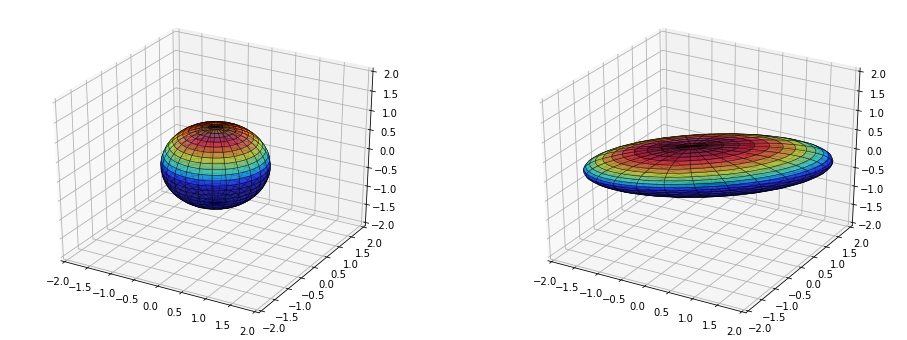

In [13]:
fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw={"projection":"3d"})

surf1 = ax[0].plot_surface(x,y,z,cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('black')

ax[0].set_xlim3d(-2,2)
ax[0].set_ylim3d(-2,2)
ax[0].set_zlim3d(-2,2)


xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j],y[i,j],z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]

surf2 = ax[1].plot_surface(xR,yR,zR,cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('black')
ax[1].set_xlim3d(-2,2)
ax[1].set_ylim3d(-2,2)
ax[1].set_zlim3d(-2,2)

plt.show()